# ST 445 - Exercise 1

In [7]:
install.packages("readxl", repos = "http://cran.us.r-project.org")


The downloaded binary packages are in
	/var/folders/vj/5wy9tscn5qb1g47fk_9vwg_40000gn/T//RtmpiUn9O0/downloaded_packages


## Question 1

In [8]:
forbes2000 <- read.csv("data/Forbes2000.csv", row.names = 1, skip = 3)

We used skip = 3 to indicate that we want to skip the first three rows, which
are just some text introducing the data set. We used row.names = 1 to indicate
the row names are in the first row (after we skip the first three).

In [9]:
forbes2000 <- transform(
    forbes2000,
    name = as.factor(forbes2000$name),
    country = as.factor(forbes2000$country),
    category = as.factor(forbes2000$category)
)

summary(forbes2000)
attach(forbes2000)

      rank                      name                country   
 Min.   :   1.0   ABB Group       :   1   United States :751  
 1st Qu.: 500.8   ABN-Amro Holding:   1   Japan         :316  
 Median :1000.5   ABSA Group      :   1   United Kingdom:137  
 Mean   :1000.5   ACE             :   1   Germany       : 65  
 3rd Qu.:1500.2   ACS Group       :   1   France        : 63  
 Max.   :2000.0   AEM             :   1   Canada        : 56  
                  (Other)         :1994   (Other)       :612  
                   category        sales            profits        
 Banking               : 313   Min.   :  0.010   Min.   :-25.8300  
 Diversified financials: 158   1st Qu.:  2.018   1st Qu.:  0.0800  
 Insurance             : 112   Median :  4.365   Median :  0.2000  
 Utilities             : 110   Mean   :  9.697   Mean   :  0.3811  
 Materials             :  97   3rd Qu.:  9.547   3rd Qu.:  0.4400  
 Oil & gas operations  :  90   Max.   :256.330   Max.   : 20.9600  
 (Other)            

The following objects are masked from forbes2000 (pos = 3):

    assets, category, country, marketvalue, name, profits, rank, sales




In [10]:
length(levels(country))
length(levels(category))

[1] 61

[1] 27

### Part a

In [11]:
print(name[order(rank)[1:10]])  # Top 10 ranked
print(name[order(sales, decreasing = TRUE)[1:10]])  # 10 maximum sales
print(name[marketvalue > 174])  # Market value > $174 billion

 [1] Citigroup           General Electric    American Intl Group
 [4] ExxonMobil          BP                  Bank of America    
 [7] HSBC Group          Toyota Motor        Fannie Mae         
[10] Wal-Mart Stores    
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine
 [1] Wal-Mart Stores         BP                      ExxonMobil             
 [4] General Motors          Ford Motor              DaimlerChrysler        
 [7] Toyota Motor            General Electric        Royal Dutch/Shell Group
[10] Total                  
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine
 [1] Citigroup           General Electric    American Intl Group
 [4] ExxonMobil          HSBC Group          Wal-Mart Stores    
 [7] Pfizer              Microsoft           Intel              
[10] Vodafone           
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine


### Part b

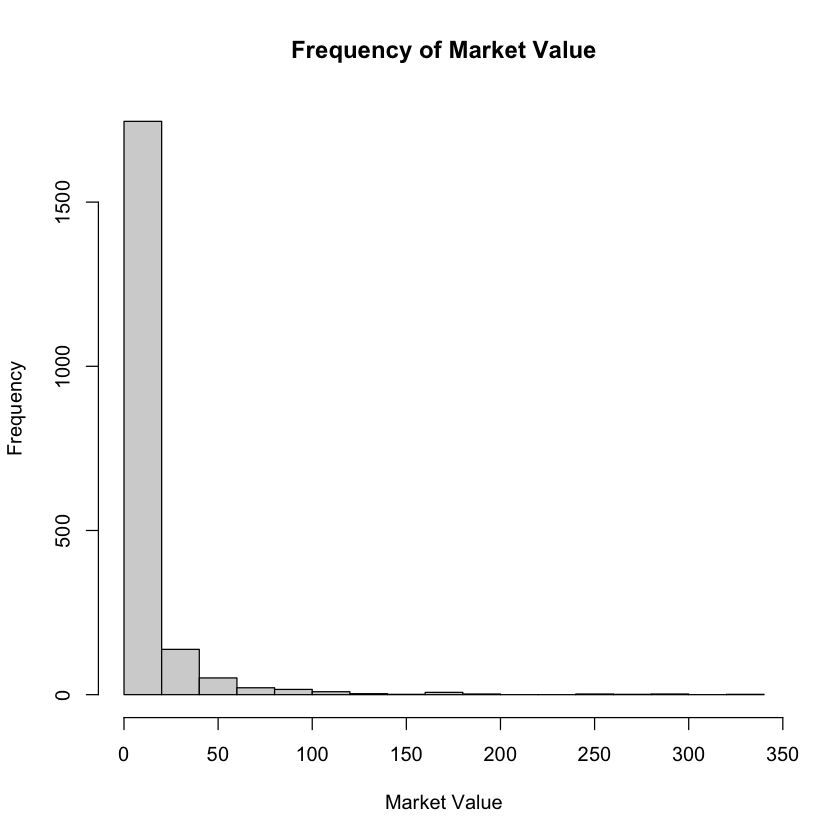

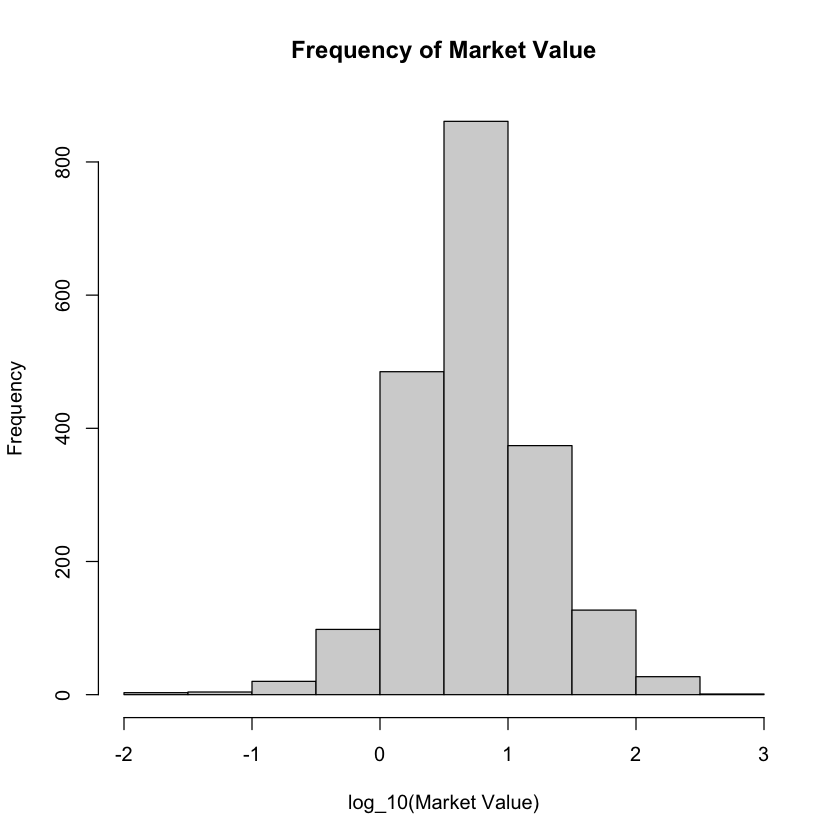

In [12]:
hist(marketvalue,
    xlab = "Market Value",
    main = "Frequency of Market Value"
)
hist(
    log(marketvalue) / log(10),
    xlab = "log_10(Market Value)",
    main = "Frequency of Market Value"
)

These plots show that the logarithm of market value follows a normal distribution, which makes more sense than market value itself following a normal distribution because it spans several orders of magnitude.

### Part c

In [13]:
mean(profits)
mean(profits, na.rm = TRUE)

[1] NA

[1] 0.3811328

mean(profits) is NaN because the profits field contains missing values, over
which the computer cannot compute the sum. By passing na.rm = TRUE we tell
the computer to ignore these missing values.

### Part d

In [14]:
median(profits[country == "United States"], na.rm = TRUE)
median(profits[country == "United Kingdom"], na.rm = TRUE)

[1] 0.24

[1] 0.205

### Part e

In [15]:
name[country == "Germany" & profits < 0]

[1] Allianz Worldwide       Deutsche Telekom        E.ON                   
 [4] HVB-HypoVereinsbank     Commerzbank             Infineon Technologies  
 [7] BHW Holding             Bankgesellschaft Berlin W&W-Wustenrot          
[10] mg technologies         Nurnberger Beteiligungs SPAR Handels           
[13] Mobilcom               
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine

### Part f

In [16]:
sort(table(category[country == "Bermuda"]), decreasing = TRUE)[1:1]

Insurance 
       10

### Part g

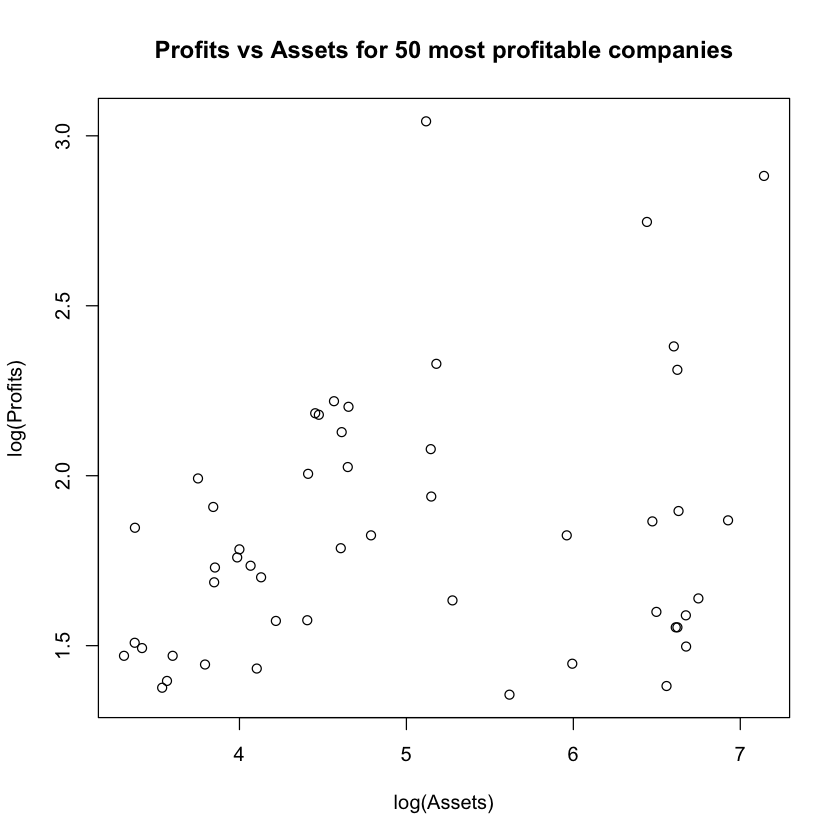

In [17]:
most_prof <- forbes2000[order(profits, decreasing = TRUE)[1:50], ]
plot(
    log(most_prof$assets),
    log(most_prof$profits),
    xlab = "log(Assets)",
    ylab = "log(Profits)",
    main = "Profits vs Assets for 50 most profitable companies"
)


## Question 2

### Part a

Using $F(x) = G((x - a)/b)$, we can compute $F^{-1}(p) = bG^{-1}(p) + a$. The qq-plot shows $F^{-1}(p)$ against $G^{-1}(p)$ parametrised by $p$, so let $x = G^{-1}(p)$ and $y = F^{-1}(p)$ then the plot follows $y = bx + a$, which is a straight line.

### Part b

In [18]:
install.packages("readxl")
library("readxl")


The downloaded binary packages are in
	/var/folders/vj/5wy9tscn5qb1g47fk_9vwg_40000gn/T//RtmpiUn9O0/downloaded_packages


In [ ]:
height <- read_xlsx("data/ST447height.xlsx")
height <- transform(
    height,
    Gender = as.factor(height$Gender)
)

qqnorm(height$Height)
qqline(height$Height)

The data appear to follow normal-distributed because the qq-plot shows a straight line compared to the theoretical normal distribution.

## Question 3

### Part a

$\sum (X_i - a)^2 = \sum (X_i - \bar{X}_n + \bar{X}_n - a)^2 = \sum (X_i - \bar{X}_n)^2 + \sum(\bar{X}_n - a)^2 + 2 \sum(X_i - \bar{X}_n)(\bar{X}_n - a)= (n - 1) S_n^2 + n(\bar{X}_n - a)^2 + 2(\bar{X}_n - a)\sum(X_i - \bar{X}_n)$

Since $\bar{X}_n = n^{-1} \sum X_i$, also $n\bar{X}_n = \sum \bar{X}_n = \sum X_i$ so $\sum(X_i - \bar{X}_n) = 0$. Therefore,
$\sum (X_i - a)^2 = (n - 1) S_n^2 + n(\bar{X}_n - a)^2$

This shows that the sample mean is the reference point that minimises the stadard deviation; that is, the mean-squared distance between points and a reference is minimised when using the sample mean.

### Part b